In [8]:
# betoltjuk a szukseges csomagokat. A meroberendezest url request eri el.

%pylab inline
import requests
import scipy.stats as stats
import json

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['power', 'Circle', 'sign', 'cosh', 'nan', 'transpose', 'beta', 'diff', 'seterr', 'prod', 'exp', 'roots', 'array', 'flatten', 'sin', 'solve', 'reshape', 'multinomial', 'binomial', 'lcm', 'source', 'log', 'vectorize', 'Polygon', 'cbrt', 'trunc', 'test', 'fft', 'mod', 'radians', 'diag', 'gamma', 'deprecated', 'add', 'det', 'var', 're', 'tanh', 'ifft', 'ones', 'tan', 'sqrt', 'zeros', 'plotting', 'product', 'partition', 'eye', 'cos', 'pi', 'poly', 'take', 'minimum', 'plot', 'Number', 'floor', 'Line2D', 'invert', 'sinc', 'conjugate', 'sinh', 'gcd', 'maximum', 'interactive', 'trace']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
#importotok
import numpy as np
from matplotlib import pyplot as plt
#plt.style.use("dark_background")

from scipy.optimize import curve_fit
import json # str --> dict
from math import radians
from scipy.stats import poisson as scipy_poisson
from scipy.special import factorial as sc_fact
fs=12  #fontsize a plotoláshoz

# bell-segedlet.ipynb importjai:
from sympy import *
init_printing()
from sympy import Matrix
from sympy.physics.quantum import TensorProduct

In [ ]:
tau=2
I=42 (40.3)

In [86]:
a0k=[22,140,469,1059,1521,2353,2775,2998,3302,3346,3112,2907,2412,1851,1273,801,409,128,14]
a0b=[92,110,481,796,1111,1334,1596,1848,1834,1852,1701,1415,1195,888,639,371,186,87,74]

In [87]:
a45k=[12,102,293,554,879,1138,1422,1544,1624,1536,1478,1250,1074,824,558,315,143,33,15]
a45b=[706,936,1190,1317,1449,1501,1517,1360,1166,971,824,538,389,221,133,142,220,323,464]

In [88]:
a90b=[1226,1193,1003,799,504,377,198,116,86,107,183,260,403,486,601,728,853,877,810]
a90k=[25,42,41,70,66,92,112,102,88,127,110,86,68,64,48,28,22,18,22]

In [89]:
a135k=[18,58,218,556,831,1293,1538,1896,2004,2146,1913,1826,1550,1200,847,583,287,114,15]
a135b=[557,317,181,142,198,340,546,734,969,1131,1304,1388,1410,1211,1132,930,736,606,406]

In [3]:
def shitreader(filename):
    f=open(filename,"r")
    data=f.readlines()
    cucc=[]
    for i in range(len(data)):
        try:
            cucc.append(json.loads(data[i][:-3]))
        except:
            pass
    f.close()
    return np.array(cucc)

In [4]:
dark=shitreader('filenev21.txt')
light=shitreader('filenev22.txt')

In [15]:
def gaussian(x, h, a, x0, sigma):
    ''' 
    Gauss-eloszlás
        x: adatsor
        h: magasság az y tengelyen
        a: amplitúdó
        x0: a csúcs helye
        sigma: szórás
    '''
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + h

def poisson(x, h, a, x0, lamb):
    '''
    Poisson-eloszlás
        x: adatsor
        h: magasság az y tengelyen
        a: amplitúdó
        x0: a csúcs helye
        lamb: A Poisson eloszlás λ paramétere
    '''
    return  a * np.exp(-lamb) * lamb**(x-x0) /sc_fact(x-x0) + h

Text(0.5, 1.0, 'Sötétfoltok eloszlása')

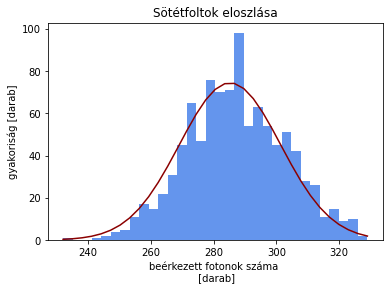

In [117]:
hist_data = []
for i in range(len(dark)):
    hist_data.append(dark[i]['0'] + dark[i]['1'])

hist_dark = plt.hist(hist_data, int((max(hist_data)-min(hist_data))/3), 
                     color='cornflowerblue', label='Mért adatok')
gauss1_opt, gauss1_cov = curve_fit(gaussian, hist_dark[1][:-1], hist_dark[0], p0=(0, 70, 300, 10) )
gauss1_err = np.sqrt(np.diag(gauss1_cov))

plt.plot(hist_dark[1], gaussian(hist_dark[1], *gauss1_opt), c='darkred', label='Illeszett Gauss-görbe')
plt.xlabel('beérkezett fotonok száma \n [darab]')
plt.ylabel('gyakoriság [darab]')
plt.title('Sötétfoltok eloszlása')

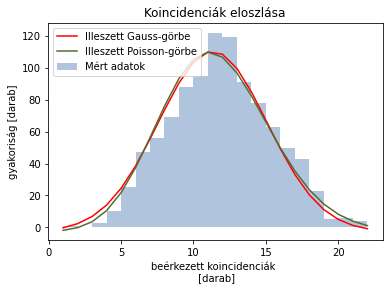

In [118]:
hist_data2 = []
for i in range(len(light)):
    hist_data2.append(light[i]['01'])

hist_light = plt.hist(hist_data2, int((max(hist_data2)-min(hist_data2))), 
                     color='lightsteelblue', label='Mért adatok')
gauss2_opt, gauss2_cov = curve_fit(gaussian, hist_light[1][:-1], hist_light[0], p0=(0, 100, 12, 10) )
gauss2_err = np.sqrt(np.diag(gauss2_cov))

poi1_opt, poi1_cov = curve_fit(poisson, hist_light[1][:-1], hist_light[0], p0=(0, 900, 0, 10) )
poi1_err = np.sqrt(np.diag(poi1_cov))

plt.plot(hist_light[1], gaussian(hist_light[1], *gauss2_opt), c='red', label='Illeszett Gauss-görbe')
plt.plot(hist_light[1], poisson(hist_light[1], *poi1_opt), c='darkolivegreen', label='Illeszett Poisson-görbe')
plt.xlabel('beérkezett koincidenciák \n [darab]')
plt.ylabel('gyakoriság [darab]')
plt.title('Koincidenciák eloszlása')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Koncidencia fotonok polarizáció függvényében \n Klasszikus eset')

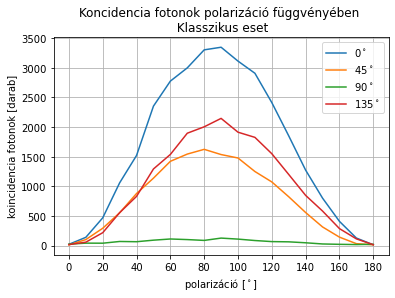

In [114]:
x=np.linspace(0,180,19)
y=np.linspace(0,180,10)
plt.plot(x,a0k,label='0$^\circ$')
plt.plot(x,a45k,label='45$^\circ$')
plt.plot(x,a90k,label='90$^\circ$')
plt.plot(x,a135k,label='135$^\circ$')
plt.legend()
plt.grid()
plt.xticks(y)
plt.xlabel('polarizáció [$^\circ$]')
plt.ylabel('koincidencia fotonok [darab]')
plt.title('Koncidencia fotonok polarizáció függvényében \n Klasszikus állapot')

Text(0.5, 1.0, 'Koncidencia fotonok polarizáció függvényében \n Bell-állapot')

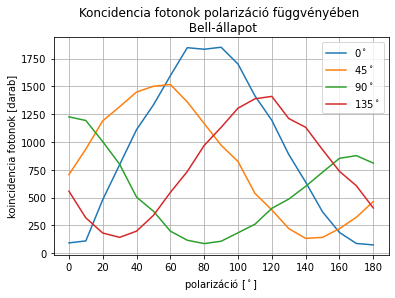

In [116]:
plt.plot(x,a0b,label='0$^\circ$')
plt.plot(x,a45b,label='45$^\circ$')
plt.plot(x,a90b,label='90$^\circ$')
plt.plot(x,a135b,label='135$^\circ$')
plt.legend()
plt.grid()
plt.xticks(y)
plt.xlabel('polarizáció [$^\circ$]')
plt.ylabel('koincidencia fotonok [darab]')
plt.title('Koncidencia fotonok polarizáció függvényében \n Bell-állapot')

In [ ]:
from sympy import *
init_printing()
from sympy import Matrix
from sympy.physics.quantum import TensorProduct


alpha, beta, gamma, delta, eta = symbols('alpha,beta,gamma,delta,eta')
alpha_1, beta_1, alpha_2, beta_2 = symbols('alpha_1,beta_1,alpha_2,beta_2')
# Bell-egyenlőtlenség a mérési szögek alapján:

# szögek:
rad0      = radians(0)     # α
rad22dot5 = radians(22.5)  # β
rad45     = radians(45)    # α_bar
rad67dot5 = radians(67.5)  # β_bar

# Egyfoton állapotok:
state_0 = Matrix([[1],[0]])
state_1 = Matrix([[0],[1]])
state_random = Matrix([[alpha],[beta]])

# Bel Φ_+ állapot:
bell_phi_plusz = (TensorProduct(state_0,state_0)+TensorProduct(state_1,state_1))/sqrt(2)

Polar_X = Matrix([[1,0],[0,0]])
rotator = Matrix([[cos(gamma),-sin(gamma)],[sin(gamma),cos(gamma)]])
polar = rotator @ Polar_X @ rotator.T #subs(gamma,-gamma)

def eab(alpha, beta, state):
    Npp=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta))@state)[0].simplify()
    Npm=(state.T@TensorProduct(polar.subs(gamma,alpha),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    Nmp=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta))@state)[0].simplify()
    Nmm=(state.T@TensorProduct(polar.subs(gamma,alpha+pi/2),polar.subs(gamma,beta+pi/2))@state)[0].simplify()
    return (Npp-Npm-Nmp+Nmm)/(Npp+Npm+Nmp+Nmm).simplify()

def chsh(state, a, b, a_bar, b_bar, S=True):
    if S == True:
        return eab(a,b, state) - eab(a, b_bar, state) + eab(a_bar, b, state) + eab(a_bar, b_bar, state)
    else:
        return eab(a,b, state) - eab(a, b_bar, state) - eab(a_bar, b, state) - eab(a_bar, b_bar, state)
    
S     = chsh(bell_phi_plusz, rad0, rad22dot5, rad45, rad67dot5)
Sbar = chsh(bell_phi_plusz, rad0, rad22dot5, rad45, rad67dot5, S=False)

In [10]:
a0b225=5166
a0b1125=15542
a0b675=19857
a0b1575=2628

a45b225=12663
a45b1125=5221
a45b675=14239
a45b1575=1857

a90b225=9183
a90b1125=1942
a90b675=1593
a90b1575=7843

a135b225=1621
a135b1125=14216
a135b675=6993
a135b1575=8862

In [25]:
E0225=(a0b225-a0b1125-a90b225+a90b1125)/(a0b225+a0b1125+a90b225+a90b1125)
E45225=(a45b225-a45b1125-a135b225+a135b1125)/(a45b225+a45b1125+a135b225+a135b1125)
E0675=(a0b675-a0b1575-a90b675+a90b1575)/(a0b675+a0b1575+a90b675+a90b1575)
E45675=(a45b675-a45b1575-a135b675+a135b1575)/(a45b675+a45b1575+a135b675+a135b1575)

dE0225=E0225*(np.sqrt(a0b225)+np.sqrt(a0b1125)+np.sqrt(a90b225)+np.sqrt(a90b1125))/(a0b225-a0b1125-a90b225+a90b1125)  +(np.sqrt(a0b225)+np.sqrt(a0b1125)+np.sqrt(a90b225)+np.sqrt(a90b1125))/(a0b225+a0b1125+a90b225+a90b1125)
dE45225=E45225*(np.sqrt(a45b225)+np.sqrt(a45b1125)+np.sqrt(a135b225)+np.sqrt(a135b1125))/(a45b225-a45b1125-a135b225+a135b1125)  +(np.sqrt(a45b225)+np.sqrt(a45b1125)+np.sqrt(a135b225)+np.sqrt(a135b1125))/(a45b225+a45b1125+a135b225+a135b1125)
dE0675=E0675*(np.sqrt(a0b675)+np.sqrt(a0b1575)+np.sqrt(a90b675)+np.sqrt(a90b1575))/(a0b675-a0b1575-a90b675+a90b1575)   +(np.sqrt(a0b675)+np.sqrt(a0b1575)+np.sqrt(a90b675)+np.sqrt(a90b1575))/(a0b675+a0b1575+a90b675+a90b1575)
dE45675=E45675*(np.sqrt(a45b675)+np.sqrt(a45b1575)+np.sqrt(a135b675)+np.sqrt(a135b1575))/(a45b675-a45b1575-a135b675+a135b1575)   +(np.sqrt(a45b675)+np.sqrt(a45b1575)+np.sqrt(a135b675)+np.sqrt(a135b1575))/(a45b675+a45b1575+a135b675+a135b1575)



In [26]:
S=E0225+E45225-E0675+E45675
S_=E0225-E45225-E0675-E45675

dS=dE0225+dE45225-dE0675+dE45675
dS_=dE0225-dE45225-dE0675-dE45675

In [13]:
S

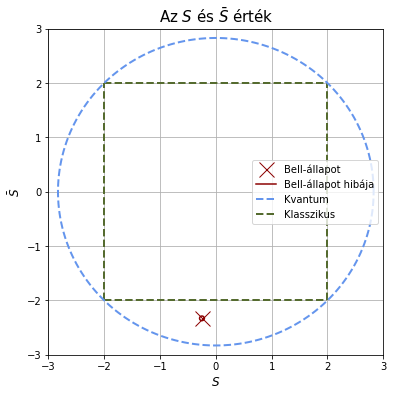

In [39]:
plt.figure(figsize=(6,6))

theta = np.linspace(0, 2*np.pi, 200 )
#Klasszikus állapot és hibaja:
#a = dkS * np.cos(theta)
#b = dkS * np.sin(theta)
#plt.plot(kS, kSbar, 'x', c='green', ms=10, label='Klasszikus állapot')
#plt.plot(a+kS, b+kSbar, c='darkgreen', label='Klasszikus állapot hibája')
#Bell-állapot és hibaja:
a = dS * np.cos(theta)
b = dS * np.sin(theta)
plt.plot(S, S_, 'x', c='darkred', ms=15,lw=5, label='Bell-állapot')
plt.plot(a+S, b+S_, c='darkred', label='Bell-állapot hibája')
# kör
a = 2*np.sqrt(2) * np.cos(theta)
b = 2*np.sqrt(2) * np.sin(theta)
plt.plot(a,b, c='cornflowerblue', ls='--',lw=2, label='Kvantum')
#négyzet
plt.vlines(-2,-2,2, color='darkolivegreen', ls='--',lw=2, label='Klasszikus')
plt.vlines( 2,-2,2, color='darkolivegreen', ls='--',lw=2)
plt.hlines(-2,-2,2, color='darkolivegreen', ls='--',lw=2)
plt.hlines( 2,-2,2, color='darkolivegreen', ls='--',lw=2)

plt.title('Az $S$ és $\\bar{S}$ érték', fontsize=fs+3)
plt.xlabel('$S$', fontsize=fs)
plt.ylabel('$\\bar{S}$', fontsize=fs)
plt.legend(fontsize=fs-2, loc=5)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
#plt.savefig('im/celtabla.pdf', bbox_inches='tight')
plt.show()